# Cognition 3.O
# Project Overview - Traffic Density Classification
### Week 5 - Project Continuation


Images of traffic at different times and locations have been successfully preprocessed and has been saved.
The goal is now  to build a model which can learn all the patterns and be able to classify the density of traffic into different categories (e.g.,empty, low, medium, high, traffic jam).

###  Why CNN MODEL?
Convolutional Neural Networks (CNNs) have the ability to automatically learn and extract important features from images. For example, in the early layers, CNNs might learn to detect edges and simple shapes. As we go deeper into the network, it starts identifying more complex patterns like textures and object parts. This automatic feature extraction makes CNNs extremely powerful for image-related tasks because it eliminates the need for manual feature engineering.


![cnndemo](cnndemo.gif)


![cnn](cnn.png)


#### Parameter Sharing
In CNNs, the same set of weights is used across different parts of the image. This concept is known as parameter sharing. It helps in reducing the number of parameters, which in turn reduces the computational load and the risk of overfitting. Since the same filters are applied to various regions of the image, the network can effectively learn features that are spatially invariant, meaning it can recognize patterns regardless of their position in the image.


#### Local Connectivity
CNNs are designed to take advantage of the local spatial structure of images. Each neuron in a convolutional layer is only connected to a small region of the input image, known as the receptive field. This local connectivity ensures that the network focuses on small, localized patterns in the image, such as edges or textures. By stacking multiple convolutional layers, CNNs can gradually capture more complex patterns and spatial hierarchies, leading to better image understanding and classification.


##### Step 1: Importing libraries

First, we need to import the necessary libraries from TensorFlow and Keras. 
These libraries provide tools for building and training our CNN model.

- **`import tensorflow as tf`**: TensorFlow is an open-source deep learning framework. We import it with the alias `tf` to simplify our code.
- **`from tensorflow.keras.models import Sequential`**: Sequential is a linear stack of layers in Keras, which allows us to build our model layer by layer.
- **`from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout`**: These are the different types of layers we will use in our CNN model:
  - **Conv2D**: Convolutional layer for feature extraction. It applies convolution operations to the input image, capturing spatial hierarchies and patterns.
  - **MaxPooling2D**: Max-pooling layer for down-sampling. It reduces the dimensionality of the feature maps, keeping the most important information.
  - **Flatten**: Flattens the input to a 1D array. It converts the 2D feature maps into a 1D vector, which can be fed into fully connected layers.
  - **Dense**: Fully connected layer. It connects every neuron in one layer to every neuron in the next layer, often used for classification.
  - **Dropout**: Dropout layer for regularization. It randomly sets a fraction of input units to 0 at each update during training to prevent overfitting.
- **`from tensorflow.keras.preprocessing.image import ImageDataGenerator`**: This class provides functions for real-time data augmentation, which helps in generating batches of image data with various transformations. Data augmentation techniques include rescaling, shearing, zooming, and flipping, which improve the robustness and generalization of the model.

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
import matplotlib.pyplot as plt


#### Step 2: Loading the Preprocessed Dataset

In [12]:
# Define the base directory
base_dir = 'C:/Users/asus/Desktop/cognition/preprocessed-dataset'  #Change the path to your directory where it's been saved

# Define the classes
classes = ['Empty', 'High', 'Low', 'Medium', 'Traffic Jam']

# Create ImageDataGenerator instance
datagen = ImageDataGenerator(rescale=1./255)  # No validation split, using whole dataset for training

# Load images from directory
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),  # Update the target size to match the preprocessing size
    batch_size=20,
    class_mode='categorical'
)



Found 3659 images belonging to 5 classes.


#### Loading the Test Dataset from the main directory 

In [13]:
# Define the testing directory
test_dir = 'C:/Users/asus/Desktop/cognition/dataset/testing'

# Create ImageDataGenerator instance for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Update the target size to match the preprocessing size
    batch_size=20,
    class_mode='categorical'
)


Found 320 images belonging to 5 classes.


#### Step 3: Define the CNN Model

## Defining and Compiling the CNN Model

### Model Architecture

1. **Input Layer**:
   - The input layer is defined with `tf.keras.Input(shape=(224, 224, 3))`, which specifies the input shape of the images. The shape `(224, 224, 3)` indicates that the input images are of size 224x224 pixels with 3 color channels (RGB).

2. **First Convolutional Layer**:
   - The first convolutional layer is a `Conv2D` layer with 32 filters, each of size 3x3. The ReLU (Rectified Linear Unit) activation function is used to introduce non-linearity to the model, allowing it to learn more complex patterns.

3. **First Max-Pooling Layer**:
   - This layer is a `MaxPooling2D` layer with a 2x2 filter, which reduces the spatial dimensions of the feature maps by taking the maximum value in each 2x2 block. This helps in reducing the computational cost and controlling overfitting.

4. **Second Convolutional Layer**:
   - The second convolutional layer is a `Conv2D` layer with 64 filters, each of size 3x3. The ReLU activation function is used again to introduce non-linearity.

5. **Second Max-Pooling Layer**:
   - This is another `MaxPooling2D` layer with a 2x2 filter to further reduce the spatial dimensions of the feature maps.

6. **Third Convolutional Layer**:
   - The third convolutional layer is a `Conv2D` layer with 128 filters, each of size 3x3. The ReLU activation function is used once more to introduce non-linearity.

7. **Third Max-Pooling Layer**:
   - This is another `MaxPooling2D` layer with a 2x2 filter to further reduce the spatial dimensions of the feature maps.

8. **Flatten Layer**:
   - The `Flatten` layer flattens the 2D feature maps into a 1D vector. This is necessary to connect the convolutional layers with the dense (fully connected) layers.

9. **First Dense Layer**:
   - The first dense layer is a `Dense` layer with 512 neurons and the ReLU activation function to introduce non-linearity.

10. **Dropout Layer**:
    - The `Dropout` layer randomly sets 50% of the input units to 0 at each update during training, which helps in preventing overfitting.

11. **Output Layer**:
    - The output layer is a `Dense` layer with a number of neurons equal to the number of classes (defined by `len(classes)`). The softmax activation function is used, which converts the output to a probability distribution over the classes.

### Model Compilation

1. **Optimizer**:
   - The Adam optimizer (`optimizer='adam'`) is chosen for training the model. Adam is an adaptive learning rate optimization algorithm that combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

2. **Loss Function**:
   - The categorical crossentropy loss function (`loss='categorical_crossentropy'`) is used, which is suitable for multi-class classification problems where the target variable is one-hot encoded. This function calculates the difference between the true labels and the predicted probabilities, helping to minimize the prediction error during training.

3. **Metrics**:
   - The accuracy metric (`metrics=['accuracy']`) is used to evaluate the model's performance during training and testing. Accuracy is the ratio of correctly predicted instances to the total instances.

### How the Model Works

- **Convolutional Layers**: These layers perform convolution operations on the input image, capturing spatial hierarchies and patterns. Each convolutional layer is followed by a ReLU activation function to introduce non-linearity.
- **Max-Pooling Layers**: These layers down-sample the feature maps, reducing their spatial dimensions while retaining the most important information. This helps in reducing the computational cost and controlling overfitting.
- **Flatten Layer**: This layer flattens the 2D feature maps into a 1D vector, which can then be fed into fully connected (dense) layers.
- **Dense Layers**: These layers are fully connected layers that learn to map the flattened feature vector to the final output classes. The first dense layer has 512 neurons and uses ReLU activation, while the output layer uses softmax activation to produce a probability distribution over the classes.
- **Dropout Layer**: This layer helps in preventing overfitting by randomly setting a fraction of the input units to 0 at each update during training.
- **Compilation**: The model is compiled with the Adam optimizer, categorical crossentropy loss function, and accuracy metric. The optimizer adjusts the learning rate during training to minimize the loss function, while the accuracy metric evaluates the model's performance.

All in all, the CNN model is designed to efficiently capture and learn the spatial hierarchies in the input images, classify them into predefined classes, and provide accurate predictions with the help of convolutional, max-pooling, flatten, dense, and dropout layers. The model is compiled with appropriate optimization and evaluation parameters to ensure effective training and performance.


In [14]:
# Define the CNN model
model = Sequential([
    tf.keras.Input(shape=(224, 224, 3)),  # according to input output size
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


#### Step 4: Train the Model

In [15]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20
)


Epoch 1/20


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


182/182 ━━━━━━━━━━━━━━━━━━━━ 169s 908ms/step - accuracy: 0.4720 - loss: 1.5015
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.7500 - loss: 0.5950  
Epoch 3/20


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


182/182 ━━━━━━━━━━━━━━━━━━━━ 144s 786ms/step - accuracy: 0.7043 - loss: 0.7377
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 10us/step - accuracy: 0.7500 - loss: 0.7695   
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 142s 776ms/step - accuracy: 0.7600 - loss: 0.5943
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 91us/step - accuracy: 0.8500 - loss: 0.4754   
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 144s 787ms/step - accuracy: 0.7956 - loss: 0.4970
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 115us/step - accuracy: 0.8500 - loss: 0.4253  
Epoch 9/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 134s 733ms/step - accuracy: 0.8295 - loss: 0.4390
Epoch 10/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 285us/step - accuracy: 0.8500 - loss: 0.3279  
Epoch 11/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 135s 737ms/step - accuracy: 0.8662 - loss: 0.3377
Epoch 12/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 185us/step - accuracy: 0.8500 - loss: 0.1873  
Epoch 13/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 138s 757ms/step - accuracy: 0.9024 - loss: 0.2730
Epoch 14/20
182/1

#### Step 5: Evaluating the Model on Training Dataset

In [16]:
# Evaluate the model on training data
train_evaluation = model.evaluate(train_generator)
print(f"Training Loss: {train_evaluation[0]}")
print(f"Training Accuracy: {train_evaluation[1]}")


183/183 ━━━━━━━━━━━━━━━━━━━━ 25s 132ms/step - accuracy: 0.9797 - loss: 0.0930
Training Loss: 0.09392944723367691
Training Accuracy: 0.9789559841156006


#### Step 6: Evaluating the Model on Test Dataset

In [17]:
# Evaluate the model
test_evaluation = model.evaluate(test_generator)
print(f"Test Loss: {test_evaluation[0]}")
print(f"Test Accuracy: {test_evaluation[1]}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.9774 - loss: 0.1153
Test Loss: 0.10179203748703003
Test Accuracy: 0.981249988079071


#### Step 7: Visualizing Performance

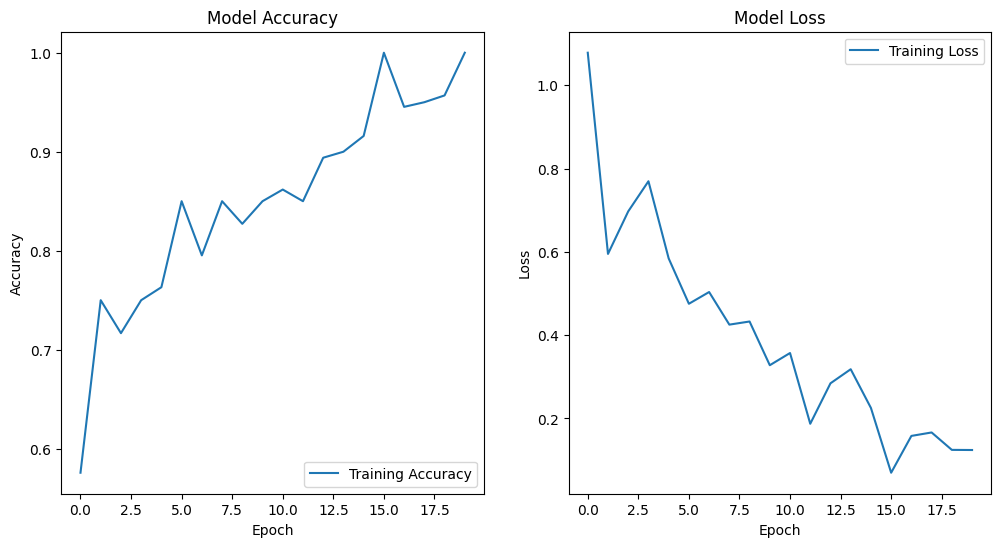

In [18]:
# Plot training accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

#### Step 8: Saving the Model

In [3]:
# Save the model in the recommended Keras format
model.save('traffic_density_cnn_model.keras') # type: ignore
print("Model saved to traffic_density_cnn_model.keras")



Model saved to traffic_density_cnn_model.keras


# Visualising and Validating 

In [19]:
%pip install --user tensorflow keras pillow opencv-python-headless numpy matplotlib
%pip install --user ultralytics



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Traffic Density Classification Visualisation and Validation


1. **Import Libraries**: Import necessary libraries for deep learning, image processing, and GUI creation.
2. **Load Model**: Load the trained CNN model for traffic density classification.
3. **Load YOLO Model**: Load the YOLOv8 model for object detection.
4. **Class Labels**: Define the labels for the classes that the CNN model can predict.
5. **Preprocess Input Image**: Preprocess the input image for the CNN model by resizing and normalizing it.
6. **Upload and Process Image**: Open a file dialog to select an image, display it, and call the process_image function.
7. **Process Image**: 
   - Preprocess the input image.
   - Predict the class of the image using the CNN model.
   - Use the YOLO model to detect objects in the image.
   - Draw bounding boxes around detected vehicles and add labels with class names and confidence scores.
   - Count the number of detected vehicles and categorize them.
   - Display the processed image with bounding boxes in the Tkinter window.
   - Update the classification and detection results in the Tkinter window.

## GUI Part

1. **Tkinter Window**:
   - Create a Tkinter window.
   - Set the window title and size.
   - Set the background color to royal blue.
2. **Styles**:
   - Configure styles for frame, label, and button widgets.
   - Set background and foreground colors, fonts, and padding for a cohesive look.
3. **Heading**:
   - Create a heading label with specified text, font, background color, and foreground color.
   - Add padding for better spacing.
4. **Upload Button**:
   - Create an upload button with specified text and command to be executed when clicked.
   - Add padding for better spacing.
5. **Frame**:
   - Create a frame to contain the image and result labels.
   - Add padding for better spacing.
6. **Image Label**:
   - Create a label to display the uploaded and processed image.
   - Position it within the frame.
7. **Classification Result**:
   - Create a label to display the classification result.
   - Position it within the frame.
8. **Detection Result**:
   - Create a label to display the number of detected vehicles.
   - Position it within the frame.
9. **Vehicle Categories**:
   - Create a label to display the categories of detected vehicles.
   - Position it within the frame.
10. **Event Loop**:
    - Start the Tkinter event loop to keep the window open and responsive.


In [1]:
import tkinter as tk
from tkinter import ttk, filedialog
from PIL import Image, ImageTk
import tensorflow as tf
import numpy as np
import cv2
from ultralytics import YOLO

# Load the trained CNN model
model = tf.keras.models.load_model('traffic_density_cnn_model.keras')

# Load YOLOv8 model
yolo_model = YOLO('yolov8n.pt')

# Define class labels
classes = ['Empty', 'High', 'Low', 'Medium', 'Traffic Jam']

# Function to preprocess the image for the CNN model
def preprocess_input_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img = np.array(img) / 255.0
    return img

# Function to handle image upload and perform classification and detection
def upload_and_process_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Display uploaded image
        img = Image.open(file_path)
        img_resized = img.resize((400, 400))
        img_tk = ImageTk.PhotoImage(img_resized)
        image_label.config(image=img_tk)
        image_label.image = img_tk

        # Process image with the model
        process_image(file_path)

# Function to process image, classify and detect objects
def process_image(image_path):
    # Preprocess the input image
    input_image = preprocess_input_image(image_path)
    input_image_batch = np.expand_dims(input_image, axis=0)
    
    # Predict the class of the image using the CNN model
    predictions = model.predict(input_image_batch)
    class_idx = np.argmax(predictions, axis=1)[0]
    class_confidence = predictions[0, class_idx]
    predicted_class = classes[class_idx]
    
    # Perform vehicle detection using the YOLO model
    image = cv2.imread(image_path)
    results = yolo_model(image)
    
    # Count the number of vehicles detected and their categories
    num_vehicles = 0
    vehicle_counts = {}

    for box in results[0].boxes:
        num_vehicles += 1
        coords = box.xyxy[0].cpu().numpy().astype(int)
        x1, y1, x2, y2 = coords
        
        # Draw bounding box on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Add class label and confidence
        class_id = int(box.cls[0].item())
        confidence = box.conf[0].item()
        vehicle_type = yolo_model.names[class_id]
        label = f'{vehicle_type} ({confidence:.2f})'
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        
        if vehicle_type in vehicle_counts:
            vehicle_counts[vehicle_type] += 1
        else:
            vehicle_counts[vehicle_type] = 1
    
    # Add vehicle count text on the image
    count_text = f"Vehicle count: {num_vehicles}"
    cv2.putText(image, count_text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    
    # Convert BGR image to RGB and display on Tkinter window
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(image_rgb)
    img_tk = ImageTk.PhotoImage(img_pil)
    image_label.config(image=img_tk)
    image_label.image = img_tk
    
    # Update the classification and detection results
    classification_result.config(text=f'Classification: {predicted_class} (Confidence: {class_confidence:.2f})')
    detection_result.config(text=f'Number of vehicles: {num_vehicles}')
    
    # Format vehicle categories
    vehicle_category_text = ", ".join([f"{count} {vehicle}" for vehicle, count in vehicle_counts.items()])
    category_result.config(text=f'Vehicle categories: {vehicle_category_text}')

# Set up Tkinter window
window = tk.Tk()
window.title("Traffic Density Classification")
window.geometry("1000x800")
window.configure(bg='#4169e1')  # Royal blue background

# Set up styles
style = ttk.Style()
style.configure('TFrame', background='#4169e1')
style.configure('TLabel', background='#4169e1', foreground='#ffffff', font=('Helvetica', 14))  # White text
style.configure('TButton', background='#4169e1', foreground='#4169e1', font=('Helvetica', 14), padding=10)  # Royal blue button with royal blue text
style.map('TButton', background=[('active', '#1976d2')], foreground=[('active', '#ffffff')])

# Add heading
heading = ttk.Label(window, text="Traffic Density Classification", font=("Helvetica", 24, 'bold'), background='#4169e1', foreground='#ffffff')
heading.pack(pady=20)

# Add upload button
upload_btn = ttk.Button(window, text="Upload Image", command=upload_and_process_image)
upload_btn.pack(pady=20)

# Add frame for image and results
frame = ttk.Frame(window)
frame.pack(pady=20)

# Add label to display the uploaded image
image_label = ttk.Label(frame)
image_label.grid(row=0, column=0, rowspan=3, padx=20)

# Add label to display classification result
classification_result = ttk.Label(frame, text="Classification: ")
classification_result.grid(row=0, column=1, sticky='nw')

# Add label to display detection result
detection_result = ttk.Label(frame, text="Number of vehicles: ")
detection_result.grid(row=1, column=1, sticky='nw')

# Add label to display vehicle categories
category_result = ttk.Label(frame, text="Vehicle categories: ")
category_result.grid(row=2, column=1, sticky='nw')



In [2]:
# Run the Tkinter event loop
window.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step

0: 480x640 (no detections), 573.3ms
Speed: 52.2ms preprocess, 573.3ms inference, 78.6ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step

0: 480x640 16 cars, 1 truck, 290.4ms
Speed: 4.0ms preprocess, 290.4ms inference, 17.7ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

0: 480x640 8 cars, 321.2ms
Speed: 9.2ms preprocess, 321.2ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

0: 480x640 1 bicycle, 12 cars, 272.2ms
Speed: 7.7ms preprocess, 272.2ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

0: 480x640 6 cars, 1 bus, 2 trucks, 290.0ms
Speed: 9.1ms preprocess, 290.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

0: 480x640 6 cars, 1 bus, 2 trucks, 281.0ms
Speed: 8.7ms preprocess, 281.0ms inference, 

# Results

![1](1.png)

![1](2.png)

![1](3.png)

![1](4.png)

![1](5.png)

![1](6.png)

# Project Title - Traffic Density Classification

**Author:** Ananya Singh  
**Specialization:** AI and ML  
**Semester:** 7th  
**Bootcamp:** Cognition 3.0 Machine Learning Bootcamp, Week 5

**Date:** July 10, 2024
